Using https://www.kaggle.com/cyannani123/keras-cellular-image-classification as test example

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib

In [2]:
from tqdm import tqdm

In [3]:
sys.path.append('../scripts')

In [4]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])

2021-12-03 15:33:10.944780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-03 15:33:10.964709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-03 15:33:10.965017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-03 15:33:10.965460: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow wi

In [5]:
x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [6]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [7]:
from data_v2 import augment
from data_v2 import get_center_box
from data_v2 import get_random_subbox
from data_v2 import ImgGen
from data_v2 import preprocess_and_scale

Loading test and train data.

Will load directly from zip for now.

In [8]:
train_data_all = pd.read_csv("../data/train.csv")
print("Shape of train_data_all:", train_data_all.shape)


Shape of train_data_all: (36517, 5)


In [9]:
train_data_all[['cell_line','exp']]=list(train_data_all.experiment.str.split('-'))

Võtame esialgu ainul HUVEC liini

In [10]:
train_data_all=train_data_all.loc[train_data_all.cell_line=='HUVEC',:]

In [11]:
train_data_all.head()

,id_code,experiment,plate,well,sirna,cell_line,exp
7750,HUVEC-01_1_B03,HUVEC-01,1,B03,sirna_403,HUVEC,01
7751,HUVEC-01_1_B04,HUVEC-01,1,B04,sirna_348,HUVEC,01
7752,HUVEC-01_1_B05,HUVEC-01,1,B05,sirna_678,HUVEC,01
7753,HUVEC-01_1_B06,HUVEC-01,1,B06,sirna_39,HUVEC,01
7754,HUVEC-01_1_B07,HUVEC-01,1,B07,sirna_355,HUVEC,01


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
train_data_strat=train_data_all.groupby('sirna',group_keys=False).apply(lambda x: x.sample(frac=0.1).reset_index(drop=True))

In [14]:
train_data_strat.loc[:,["site"]]="1"

In [15]:
sirna_label_encoder_sample_1 = LabelEncoder().fit(train_data_strat.sirna)

In [16]:
train_gen = ImgGen(train_data_strat,batch_size=16,preprocess=get_random_subbox,shuffle=True,label_encoder=sirna_label_encoder_sample_1, path=f'../data/train/',cache=True)

In [17]:
train_gen[0]

(array([[[[0.01176471, 0.00784314, 0.00784314, ..., 0.01176471,
           0.00784314, 0.01176471],
          [0.01176471, 0.00784314, 0.00784314, ..., 0.01176471,
           0.00784314, 0.01176471],
          [0.01176471, 0.00784314, 0.00784314, ..., 0.00784314,
           0.00784314, 0.01176471],
          ...,
          [0.00392157, 0.00392157, 0.00392157, ..., 0.01568627,
           0.01568627, 0.01176471],
          [0.00392157, 0.00392157, 0.00392157, ..., 0.01568627,
           0.01568627, 0.01568627],
          [0.00392157, 0.00392157, 0.00392157, ..., 0.01568627,
           0.01568627, 0.01568627]],
 
         [[0.02745098, 0.02352941, 0.02352941, ..., 0.05490196,
           0.05098039, 0.0627451 ],
          [0.03137255, 0.02745098, 0.02352941, ..., 0.05490196,
           0.05490196, 0.05882353],
          [0.03529412, 0.03137255, 0.02352941, ..., 0.05098039,
           0.05490196, 0.0627451 ],
          ...,
          [0.01568627, 0.01960784, 0.01960784, ..., 0.09803922,
   

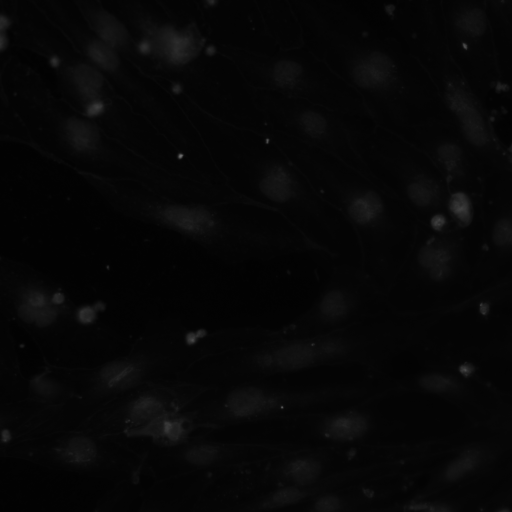

In [18]:
train_gen._batches[0][0][5]

In [19]:
x_images=train_gen._batches[0]

In [36]:
import random
seed = random.randint(0,2**32-1)


In [37]:
img_prepro = [preprocess_and_scale(img, get_random_subbox, seed=seed) for img in x_images]

In [38]:
x_s1_c1 = np.array(img_prepro[0])/255
x_s1_c2 = np.array(img_prepro[1])/255
x_s1_c3 = np.array(img_prepro[2])/255

x_s1_c4 = np.array(img_prepro[3])/255
x_s1_c5 = np.array(img_prepro[4])/255
x_s1_c6 = np.array(img_prepro[5])/255

In [39]:
c1_c3_img = np.array([x_s1_c1,x_s1_c2,x_s1_c3])

In [40]:
c4_c6_img = np.array([x_s1_c4,x_s1_c5,x_s1_c6])

In [41]:
from matplotlib import pyplot as plt

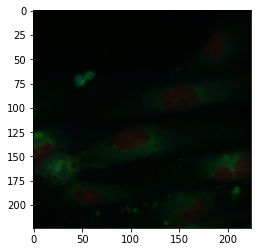

In [42]:
plt.imshow(x_s1_c1[0:3].transpose(1,2,0)*255)

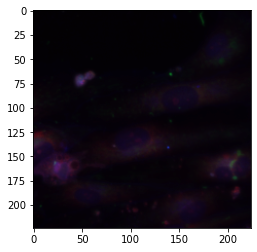

In [43]:
plt.imshow(x_s1_c1[3:6].transpose(1,2,0)*500)